In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn import preprocessing
#%matplotlib inline

In [3]:
df=pd.read_csv("C:\\Users\\ozcan\\Downloads\\Telegram Desktop\\column_2C_weka.csv")
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [14]:
a = df[df["class"] =="Abnormal"]
n = df[df["class"] =="Normal"]

In [15]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          210 non-null    float64
 1   pelvic_tilt numeric       210 non-null    float64
 2   lumbar_lordosis_angle     210 non-null    float64
 3   sacral_slope              210 non-null    float64
 4   pelvic_radius             210 non-null    float64
 5   degree_spondylolisthesis  210 non-null    float64
 6   class                     210 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.1+ KB


In [16]:
n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 210 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          100 non-null    float64
 1   pelvic_tilt numeric       100 non-null    float64
 2   lumbar_lordosis_angle     100 non-null    float64
 3   sacral_slope              100 non-null    float64
 4   pelvic_radius             100 non-null    float64
 5   degree_spondylolisthesis  100 non-null    float64
 6   class                     100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 6.2+ KB


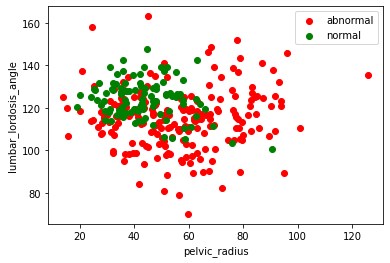

In [17]:
plt.scatter(a.lumbar_lordosis_angle,a.pelvic_radius, color="red", label="abnormal")
plt.scatter(n.lumbar_lordosis_angle,n.pelvic_radius, color="green", label="normal")
plt.legend()
plt.xlabel("pelvic_radius")
plt.ylabel("lumbar_lordosis_angle")
plt.show()

In [21]:
df["class"] = [1 if each=="Abnormal" else 0 for each in df["class"]] 

In [22]:
y= df["class"].values

In [23]:
x_data= df.iloc[:,1:3].values

In [24]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_head = knn.predict(x_test)
y_head

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1], dtype=int64)

In [28]:
print("when k is {}, accuracy of knn classification {} ".format(3,knn.score(x_test,y_test)))

when k is 3, accuracy of knn classification 0.7096774193548387 


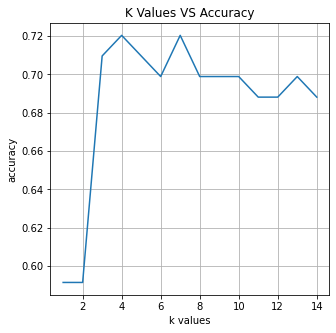

Best accuracy is 0.7204301075268817 with K = 4


In [29]:
test_accuracy = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    test_accuracy.append(knn2.score(x_test,y_test))
    
plt.figure(figsize=(5,5))
plt.plot(range(1,15),test_accuracy)
plt.title('K Values VS Accuracy')
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.grid()
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

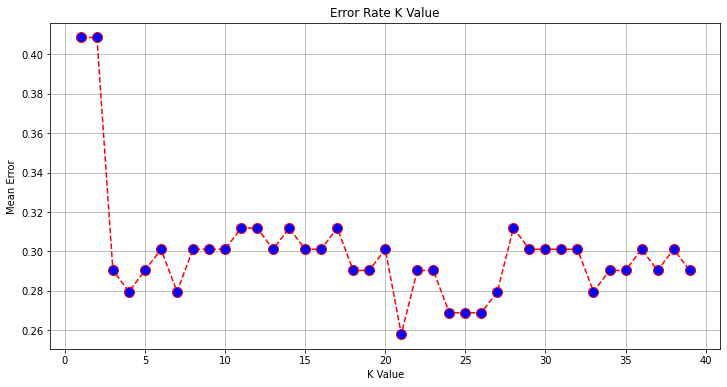

In [30]:
error = []
for i in range (1,40):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()
plt.show()

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_head)

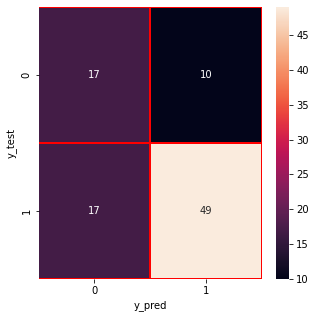

In [32]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm,annot=True,fmt= '.0f',linewidths=0.5,linecolor="red",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()